## 正规方程

用公式直接求解线性回归模型。

准备只有一个特征 $x_1$ 的线性的随机数据：

Text(0, 0.5, 'y')

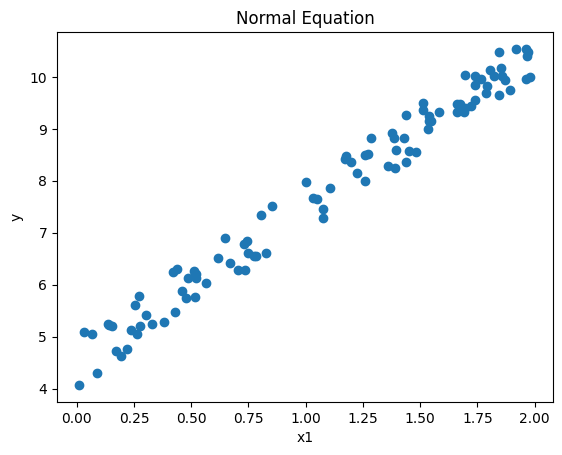

In [57]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

fig, gmmAx = plt.subplots()
gmmAx.scatter(X, y)
gmmAx.set_title("Normal Equation")
gmmAx.set_xlabel("x1")
gmmAx.set_ylabel("y")

计算步骤如下：

* 添加偏置项 $x_0$ ，其值都是1
* 利用`numpy`的线性代数模块`linalg`中的`inv()`函数来计算矩阵的逆
* 利用`dot()`方法来计算矩阵的乘法

In [58]:
# concatenate matrix
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.51949245]
 [2.9875368 ]]


我们期望得到 $\theta_0$ = 4,  $\theta_1$ = 3，但是在生成数据时我们加入了噪音，所以我们只能得到一个近似值。下面我们画出这个线性回归模型的图像：

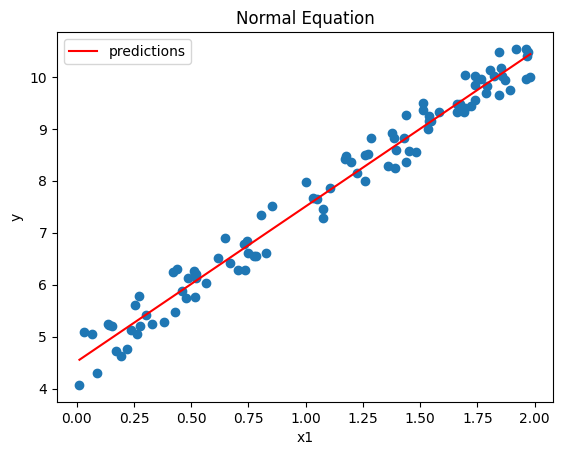

In [59]:
X_new = np.linspace(np.min(X), np.max(X), 30)
X_new_b = np.c_[np.ones((X_new.shape)), X_new]
y_predict = X_new_b.dot(theta_best)

fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X_new, y_predict, 'r-', label='predictions')

ax.set_title("Normal Equation")
ax.set_xlabel("x1")
ax.set_ylabel("y")
ax.legend()


如果我们使用`sklearn`中的`LinearRegression`可以达到同样的效果：

[4.51949245] [[2.9875368]]


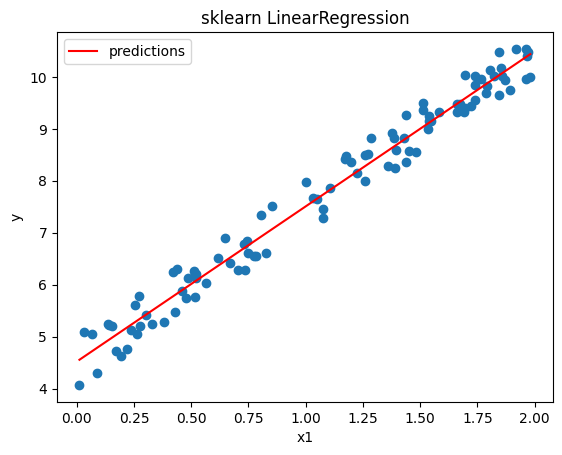

In [60]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
# 输入要保证是二维的，一行表示一个样本点
y_pred = lin_reg.predict(X_new.reshape(-1, 1))

fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X_new, y_pred, 'r-', label='predictions')

ax.set_title("sklearn LinearRegression")
ax.set_xlabel("x1")
ax.set_ylabel("y")
ax.legend()